In [63]:
# Need to prepare the news headlines in the same way as the training data
# Load the news headlines
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

stock = "QQQ"

        
def preprocess(input_series):
    result_series = input_series.copy()
    
    # Apply preprocessing steps to the series
    result_series = result_series.str.lower()  # Convert to lowercase
    result_series = result_series.str.replace("[^\w\s]", "", regex=True)  # Remove punctuation marks
    result_series = result_series.str.replace("\d+", "", regex=True)  # Remove numbers
    result_series = result_series.str.replace("\s+", " ", regex=True)  # Replace newlines and multiple spaces with a single space

    return result_series

In [64]:
data = pd.read_csv('raw_analyst_ratings.csv')
data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [65]:
# Get the 50 most stock with the most amount of datee
data['stock'].value_counts().head(50)

stock
MRK     3333
MS      3238
NVDA    3146
MU      3142
QQQ     3106
NFLX    3028
M       3025
EBAY    3018
GILD    2968
VZ      2966
QCOM    2941
JNJ     2928
DAL     2926
BABA    2858
KO      2797
AA      2739
EWU     2702
ORCL    2701
FDX     2629
HD      2612
WFC     2612
BBRY    2580
BMY     2528
JCP     2516
LLY     2417
AGN     2408
CMG     2370
EWJ     2362
CAT     2322
GPRO    2303
TWX     2279
CHK     2246
GLD     2236
P       2234
LMT     2228
MCD     2228
FSLR    2222
NOK     2217
EA      2169
FCX     2162
MA      2152
PEP     2141
GPS     2127
XLF     2114
GRPN    2093
TM      2055
EWP     2027
HAL     2017
LOW     2013
ADBE    1999
Name: count, dtype: int64

In [66]:
# Im going to use the MS stock as it has a lot of dates
news_data = data[data['stock'] == stock]

news_data.head()

,Unnamed: 0,headline,url,publisher,date,stock
1049426,1054626,Afternoon Market Stats in 5 Minutes,https://www.benzinga.com/markets/20/06/1622357...,Benzinga Insights,2020-06-10 12:12:25-04:00,QQQ
1049427,1054627,Morning Market Stats in 5 Minutes,https://www.benzinga.com/markets/20/06/1622174...,Benzinga Insights,2020-06-10 10:22:11-04:00,QQQ
1049428,1054628,Afternoon Market Stats in 5 Minutes,https://www.benzinga.com/markets/20/06/1621366...,Benzinga Insights,2020-06-09 12:14:26-04:00,QQQ
1049429,1054629,Cramer: NASDAQ Rebound Makes Sense As It Bette...,https://www.benzinga.com/markets/20/06/1621185...,Jayson Derrick,2020-06-09 10:31:06-04:00,QQQ
1049430,1054630,Morning Market Stats in 5 Minutes,https://www.benzinga.com/markets/20/06/1621207...,Benzinga Insights,2020-06-09 10:08:00-04:00,QQQ


In [67]:
news_data.shape

(3106, 6)

In [68]:
# Get the date range
print(news_data['date'].min())
print(news_data['date'].max())

2011-03-16 00:00:00
2020-06-10 12:12:25-04:00


In [69]:
# Get the top ten stocks with the most amount of unique dates
top_stocks = data.groupby('stock')['date'].nunique().sort_values(ascending=False).head(10)
print(top_stocks)

stock
MRK     1615
KO      1407
MS      1392
JNJ     1378
DAL     1357
GILD    1335
VZ      1315
M       1298
BMY     1288
GLD     1224
Name: date, dtype: int64


In [70]:
news_data

,Unnamed: 0,headline,url,publisher,date,stock
1049426,1054626,Afternoon Market Stats in 5 Minutes,https://www.benzinga.com/markets/20/06/1622357...,Benzinga Insights,2020-06-10 12:12:25-04:00,QQQ
1049427,1054627,Morning Market Stats in 5 Minutes,https://www.benzinga.com/markets/20/06/1622174...,Benzinga Insights,2020-06-10 10:22:11-04:00,QQQ
1049428,1054628,Afternoon Market Stats in 5 Minutes,https://www.benzinga.com/markets/20/06/1621366...,Benzinga Insights,2020-06-09 12:14:26-04:00,QQQ
1049429,1054629,Cramer: NASDAQ Rebound Makes Sense As It Bette...,https://www.benzinga.com/markets/20/06/1621185...,Jayson Derrick,2020-06-09 10:31:06-04:00,QQQ
1049430,1054630,Morning Market Stats in 5 Minutes,https://www.benzinga.com/markets/20/06/1621207...,Benzinga Insights,2020-06-09 10:08:00-04:00,QQQ
...,...,...,...,...,...,...
1052527,1057738,"Stocks Grind Higher On Wednesday (SPY, QQQQ, G...",https://www.benzinga.com/etfs/bond-etfs/11/03/...,Scott Rubin,2011-03-23 00:00:00,QQQ
1052528,1057739,"Doug Kass Shorting Broader ETFs (IWM, SPY, QQQ)",https://www.benzinga.com/trading-ideas/short-i...,Roger Nachman,2011-03-23 00:00:00,QQQ
1052529,1057740,"Reminder: QQQQ Changes To QQQ Today (QQQQ, QQQ)",https://www.benzinga.com/etfs/new-etfs/11/03/9...,Benzinga Staff,2011-03-23 00:00:00,QQQ
1052530,1057741,PowerShares QQQ Ticker to Change from ‘QQQQ' t...,https://www.benzinga.com/etfs/sector-etfs/11/0...,Benzinga Staff,2011-03-23 00:00:00,QQQ


In [71]:
# Apply the preprocessing function to the news headlines
news_data['headline'] = preprocess(news_data['headline'])

In [72]:
news_data

,Unnamed: 0,headline,url,publisher,date,stock
1049426,1054626,afternoon market stats in minutes,https://www.benzinga.com/markets/20/06/1622357...,Benzinga Insights,2020-06-10 12:12:25-04:00,QQQ
1049427,1054627,morning market stats in minutes,https://www.benzinga.com/markets/20/06/1622174...,Benzinga Insights,2020-06-10 10:22:11-04:00,QQQ
1049428,1054628,afternoon market stats in minutes,https://www.benzinga.com/markets/20/06/1621366...,Benzinga Insights,2020-06-09 12:14:26-04:00,QQQ
1049429,1054629,cramer nasdaq rebound makes sense as it better...,https://www.benzinga.com/markets/20/06/1621185...,Jayson Derrick,2020-06-09 10:31:06-04:00,QQQ
1049430,1054630,morning market stats in minutes,https://www.benzinga.com/markets/20/06/1621207...,Benzinga Insights,2020-06-09 10:08:00-04:00,QQQ
...,...,...,...,...,...,...
1052527,1057738,stocks grind higher on wednesday spy qqqq gld ...,https://www.benzinga.com/etfs/bond-etfs/11/03/...,Scott Rubin,2011-03-23 00:00:00,QQQ
1052528,1057739,doug kass shorting broader etfs iwm spy qqq,https://www.benzinga.com/trading-ideas/short-i...,Roger Nachman,2011-03-23 00:00:00,QQQ
1052529,1057740,reminder qqqq changes to qqq today qqqq qqq,https://www.benzinga.com/etfs/new-etfs/11/03/9...,Benzinga Staff,2011-03-23 00:00:00,QQQ
1052530,1057741,powershares qqq ticker to change from qqqq to qqq,https://www.benzinga.com/etfs/sector-etfs/11/0...,Benzinga Staff,2011-03-23 00:00:00,QQQ


In [73]:
# Load the historical financial data
stock_data = pd.read_csv(f'stock_data/{stock}_historical_data.csv')

stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-03-16,55.029999,55.340000,53.770000,54.150002,48.142254,176507700
1,2011-03-17,55.009998,55.240002,54.130001,54.650002,48.586777,94434500
2,2011-03-18,55.220001,55.220001,54.410000,54.450001,48.477268,94887200
3,2011-03-21,55.279999,55.779999,54.500000,55.500000,49.412094,57423000
4,2011-03-22,55.580002,55.610001,55.279999,55.400002,49.323044,36162100


In [74]:
import os
import pickle
import torch
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from rich.progress import track
from tqdm import tqdm

merged_df = None

nltk.download('vader_lexicon')

class FinbertClassifier(BaseEstimator, TransformerMixin):
    def __init__(self, model_path="ProsusAI/finbert"):
        self.tokenizer = AutoTokenizer.from_pretrained(model_path)
        self.model = AutoModelForSequenceClassification.from_pretrained(model_path)

    def predict(self, texts):
        inputs = self.tokenizer(texts, padding=True, truncation=True, return_tensors="pt")
        with torch.no_grad():
            outputs = self.model(**inputs)
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=-1)
        return predictions.numpy()

# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()

# List all of the models in the models directory
available_models = os.listdir('models')

data_directory = 'news_data_with_sentiment'
file_path = os.path.join(data_directory, f'{stock}_data_with_sentiment.csv')

if os.path.exists(file_path):
    # If the file exists, load the DataFrame
    news_data = pd.read_csv(file_path)
else:
    # If the file doesn't exist, run through the models to create it
    for model_name in tqdm(available_models, desc="Processing models..."):
        # Load the model
        model = pickle.load(open(f'models/{model_name}', 'rb'))
        # Predict the sentiment 
        model_key = f'Sentiment_{model_name.split("_pipeline")[0]}'
        headlines_list = news_data['headline'].tolist()  # Ensure the input is a list of strings

        if isinstance(model, FinbertClassifier) or isinstance(model, Pipeline):
            # Use predict method for FinbertClassifier or Pipeline
            news_data[model_key] = model.predict(headlines_list)
        else:
            # Other model types (if any) can be handled here
            news_data[model_key] = model.predict(headlines_list)

    news_data['Sentiment_VADER'] = [(vader.polarity_scores(headline)['compound'] + 1) / 2 for headline in news_data['headline']]
    
    
    news_data.to_csv(file_path, index=False)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/calnan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [75]:
# Remove the pipeline suffix from the model names and add a Sentiment_ prefix
available_models = [f"Sentiment_{model_name.split('_pipeline')[0]}" for model_name in available_models]

In [76]:
news_data['Sentiment_Random'] = np.random.randint(2, size=len(news_data))

# # Add it to the available models list
available_models.append('Sentiment_Random')

In [77]:
available_models

['Sentiment_DecisionTreeClassifier',
 'Sentiment_finbert',
 'Sentiment_LogisticRegression',
 'Sentiment_KNeighborsClassifier',
 'Sentiment_MultinomialNB',
 'Sentiment_SGDClassifier',
 'Sentiment_GradientBoostingClassifier',
 'Sentiment_XGBClassifier',
 'Sentiment_RandomForestClassifier',
 'Sentiment_Random']

In [78]:
# Initialize a dictionary to hold the counts
model_counts_dict = {}

for model in available_models:
    # Store the value counts in the dictionary
    model_counts_dict[model] = news_data[model].value_counts()

# Convert the dictionary to a DataFrame
model_sentiment_counts = pd.DataFrame(model_counts_dict)

# Transpose the DataFrame to have models as rows and sentiment values as columns
model_sentiment_counts = model_sentiment_counts.T

# Fill NaN values with 0, in case some sentiment values are missing in some models
model_sentiment_counts = model_sentiment_counts.fillna(0)

# Display the DataFrame
model_sentiment_counts


,0,1,2
Sentiment_DecisionTreeClassifier,141.0,2965.0,0.0
Sentiment_finbert,399.0,1228.0,1479.0
Sentiment_LogisticRegression,445.0,2661.0,0.0
Sentiment_KNeighborsClassifier,475.0,2631.0,0.0
Sentiment_MultinomialNB,481.0,2625.0,0.0
Sentiment_SGDClassifier,739.0,2367.0,0.0
Sentiment_GradientBoostingClassifier,163.0,2943.0,0.0
Sentiment_XGBClassifier,309.0,2797.0,0.0
Sentiment_RandomForestClassifier,207.0,2899.0,0.0
Sentiment_Random,1554.0,1552.0,0.0


In [79]:
news_data['date'] = news_data['date'].str.split(' ').str[0]

news_data.head()

,Unnamed: 0,headline,url,publisher,date,stock,Sentiment_DecisionTreeClassifier,Sentiment_finbert,Sentiment_LogisticRegression,Sentiment_KNeighborsClassifier,Sentiment_MultinomialNB,Sentiment_SGDClassifier,Sentiment_GradientBoostingClassifier,Sentiment_XGBClassifier,Sentiment_RandomForestClassifier,Sentiment_VADER,Sentiment_Random
0,1054626,afternoon market stats in minutes,https://www.benzinga.com/markets/20/06/1622357...,Benzinga Insights,2020-06-10,QQQ,1,2,1,1,0,0,1,1,1,0.5000,1
1,1054627,morning market stats in minutes,https://www.benzinga.com/markets/20/06/1622174...,Benzinga Insights,2020-06-10,QQQ,1,2,1,1,1,1,1,1,1,0.5000,1
2,1054628,afternoon market stats in minutes,https://www.benzinga.com/markets/20/06/1621366...,Benzinga Insights,2020-06-09,QQQ,1,2,1,1,0,0,1,1,1,0.5000,0
3,1054629,cramer nasdaq rebound makes sense as it better...,https://www.benzinga.com/markets/20/06/1621185...,Jayson Derrick,2020-06-09,QQQ,1,0,1,1,1,1,1,1,1,0.7202,1
4,1054630,morning market stats in minutes,https://www.benzinga.com/markets/20/06/1621207...,Benzinga Insights,2020-06-09,QQQ,1,2,1,1,1,1,1,1,1,0.5000,1


In [80]:
# Convert the 'date' column to datetime and extract the date part
news_data['date'] = pd.to_datetime(news_data['date']).dt.date

daily_sentiments = {}

# Aggregate the sentiment values by date, i.e. if there are multiple headlines for a date, take the most common sentiment value
for model in available_models:
    daily_sentiments[model] = news_data.groupby('date')[model].min()#apply(lambda x: x.mode().iloc[0])

daily_sentiments

{'Sentiment_DecisionTreeClassifier': date
 2011-03-16    1
 2011-03-23    1
 2011-03-25    1
 2011-03-28    0
 2011-03-29    0
              ..
 2020-06-01    0
 2020-06-05    1
 2020-06-08    1
 2020-06-09    1
 2020-06-10    1
 Name: Sentiment_DecisionTreeClassifier, Length: 1104, dtype: int64,
 'Sentiment_finbert': date
 2011-03-16    2
 2011-03-23    0
 2011-03-25    0
 2011-03-28    1
 2011-03-29    1
              ..
 2020-06-01    1
 2020-06-05    2
 2020-06-08    2
 2020-06-09    0
 2020-06-10    2
 Name: Sentiment_finbert, Length: 1104, dtype: int64,
 'Sentiment_LogisticRegression': date
 2011-03-16    0
 2011-03-23    0
 2011-03-25    1
 2011-03-28    0
 2011-03-29    0
              ..
 2020-06-01    0
 2020-06-05    1
 2020-06-08    1
 2020-06-09    1
 2020-06-10    1
 Name: Sentiment_LogisticRegression, Length: 1104, dtype: int64,
 'Sentiment_KNeighborsClassifier': date
 2011-03-16    1
 2011-03-23    1
 2011-03-25    1
 2011-03-28    0
 2011-03-29    1
              ..
 2

In [81]:
# Merge with stock data

# Ensure the stock data's 'Date' column is in the correct format
# stock_data['Date'] = pd.to_datetime(stock_data['Date']).dt.date

# Remame the date column from average_daily_sentiment to 'Date'
# average_daily_sentiment = average_daily_sentiment.rename(columns={'date': 'Date'})

for model in available_models:
    # Rename the columns to 'Date' and 'Sentiment'
    daily_sentiments[model] = daily_sentiments[model].reset_index().rename(columns={'date': 'Date', model: 'Sentiment'})

# average_daily_sentiment

In [82]:
for model in available_models:
    daily_sentiments[model]['Date'] = pd.to_datetime(daily_sentiments[model]['Date'])

stock_data['Date'] = pd.to_datetime(stock_data['Date'])

all_sentiments = pd.DataFrame()

for model in available_models:
    sentiment_data = daily_sentiments[model].rename(columns={'Sentiment': f'Sentiment_{model.split("_")[1]}'})
    
    if all_sentiments.empty:
        all_sentiments = sentiment_data
    else:
        # Inspect the head of dataframes before merging

        all_sentiments = all_sentiments.merge(sentiment_data, on='Date', how='outer')


merged_df = stock_data.merge(all_sentiments, on='Date', how='left')

# Save the data
merged_df.to_csv(f'stock_data_wtih_features/{stock}_data_with_sentiment.csv', index=False)


In [83]:
merged_df

,Date,Open,High,Low,Close,Adj Close,Volume,Sentiment_DecisionTreeClassifier,Sentiment_finbert,Sentiment_LogisticRegression,Sentiment_KNeighborsClassifier,Sentiment_MultinomialNB,Sentiment_SGDClassifier,Sentiment_GradientBoostingClassifier,Sentiment_XGBClassifier,Sentiment_RandomForestClassifier,Sentiment_Random
0,2011-03-16,55.029999,55.340000,53.770000,54.150002,48.142254,176507700,1.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
1,2011-03-17,55.009998,55.240002,54.130001,54.650002,48.586777,94434500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-03-18,55.220001,55.220001,54.410000,54.450001,48.477268,94887200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-03-21,55.279999,55.779999,54.500000,55.500000,49.412094,57423000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-03-22,55.580002,55.610001,55.279999,55.400002,49.323044,36162100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2319,2020-06-03,236.259995,237.470001,235.350006,236.690002,231.988998,37228700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2320,2020-06-04,236.330002,237.789993,233.679993,235.029999,230.361969,38716100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2321,2020-06-05,236.220001,240.300003,235.630005,239.690002,234.929443,47365600,1.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
2322,2020-06-08,239.539993,241.679993,237.910004,241.550003,236.752518,32937300,1.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0


In [84]:
# import pandas as pd

# # Assuming merged_df is your final merged DataFrame

# # Add a another column to the data called 'Sentiment_Random' and fill it with random values either 0 or 1
merged_df['Sentiment_Random'] = np.random.randint(2, size=len(merged_df))

# # Add it to the available models list
available_models.append('Sentiment_Random')

# # Initialize a DataFrame to store correlations
# correlations = pd.DataFrame(columns=['Model', 'Correlation'])

# # Calculate and store correlations for each model
# for model in available_models:
#     correlation = merged_df[['Close', model]].corr().iloc[0, 1]
#     new_row = pd.DataFrame({'Model': [model], 'Correlation': [correlation]})
#     correlations = pd.concat([correlations, new_row], ignore_index=True)

# # Sort the DataFrame by correlation in descending order
# correlations_sorted = correlations.sort_values(by='Correlation', ascending=False)

# # Display the sorted correlations
# correlations_sorted


In [85]:
merged_df

,Date,Open,High,Low,Close,Adj Close,Volume,Sentiment_DecisionTreeClassifier,Sentiment_finbert,Sentiment_LogisticRegression,Sentiment_KNeighborsClassifier,Sentiment_MultinomialNB,Sentiment_SGDClassifier,Sentiment_GradientBoostingClassifier,Sentiment_XGBClassifier,Sentiment_RandomForestClassifier,Sentiment_Random
0,2011-03-16,55.029999,55.340000,53.770000,54.150002,48.142254,176507700,1.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1
1,2011-03-17,55.009998,55.240002,54.130001,54.650002,48.586777,94434500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2011-03-18,55.220001,55.220001,54.410000,54.450001,48.477268,94887200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,2011-03-21,55.279999,55.779999,54.500000,55.500000,49.412094,57423000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,2011-03-22,55.580002,55.610001,55.279999,55.400002,49.323044,36162100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2319,2020-06-03,236.259995,237.470001,235.350006,236.690002,231.988998,37228700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2320,2020-06-04,236.330002,237.789993,233.679993,235.029999,230.361969,38716100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2321,2020-06-05,236.220001,240.300003,235.630005,239.690002,234.929443,47365600,1.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1
2322,2020-06-08,239.539993,241.679993,237.910004,241.550003,236.752518,32937300,1.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1


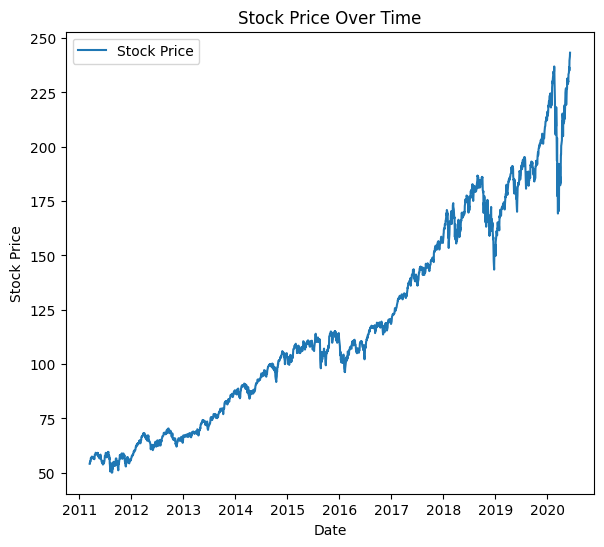

In [86]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(merged_df['Date'], merged_df['Close'], label='Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Over Time')
plt.legend()

# plt.subplot(1, 2, 2)
# plt.plot(merged_df['Date'], merged_df['Sentiment'], label='Average Sentiment', color='orange')
# plt.xlabel('Date')
# plt.ylabel('Average Sentiment')
# plt.title('Average Sentiment Over Time')
# plt.legend()

# plt.tight_layout()
plt.savefig(f'results/{stock}/{stock}.png')
plt.show()


In [87]:
# Percentage change in stock price from start to end
stock_price_change = (merged_df['Close'].iloc[-1] - merged_df['Close'].iloc[0]) / merged_df['Close'].iloc[0] * 100
print(f"Stock price change: {stock_price_change:.2f}%")

Stock price change: 349.31%


In [88]:
# import matplotlib.pyplot as plt
# import random

# # Determine the number of models
# num_models = len(available_models)

# # Initialize subplots - two columns for each model, one for portfolio value and one for shares owned
# fig, axes = plt.subplots(nrows=num_models, ncols=2, figsize=(15, 5 * num_models))

# final_portfolio_values = {}
# min_cash_reserve = 500
# # Iterate over each sentiment analysis model and plot data
# for i, model in enumerate(available_models):
#     cash = 10000
#     shares_owned = 0
#     portfolio_values = []
#     shares_history = []

#     sentiment_column = f'Sentiment_{model.split("_")[1]}'
#     # Define transaction cost per trade
#     transaction_cost = 10

#     # Define minimum cash reserve
#     min_cash_reserve = 500

#     # Define maximum percentage of cash to use in a single buy transaction
#     max_cash_percent_for_buy = 0.5

#     # Define percentage of shares to sell
#     sell_percent = 0.1


#     for index, row in merged_df.iterrows():
#         stock_price = row['Close']
#         sentiment = row[f'Sentiment_{model.split("_")[1]}']

#         # if sentiment is nan, skip the action
#         if not np.isnan(sentiment):
#             # Buy strategy: Allocate all available cash to buy shares
#             if model == 'Sentiment_finbert':
#                 if sentiment == 2.0:  # Strong Buy
#                     buy_cash = max(cash - min_cash_reserve, 0)
#             else:
#                 if sentiment == 1.0:  # Buy
#                     buy_cash = max(cash - min_cash_reserve, 0)

#             if buy_cash > 0:
#                 shares_bought = buy_cash // stock_price
#                 cash -= shares_bought * stock_price
#                 shares_owned += shares_bought

#             # Sell strategy: Sell all shares when sentiment is negative
#             if model == 'Sentiment_finbert':
#                 if sentiment == 0.0:  # Strong Sell
#                     cash += shares_owned * stock_price
#                     shares_owned = 0
#             else:
#                 if sentiment == 0.0:  # Sell
#                     cash += shares_owned * stock_price
#                     shares_owned = 0


#         portfolio_value = cash + (shares_owned * stock_price)
#         portfolio_values.append(portfolio_value)
#         shares_history.append(shares_owned)

#     final_portfolio_values[model] = portfolio_value

#     axes[i, 0].plot(merged_df['Date'], portfolio_values, label=f'Portfolio Value - {model}', color='tab:blue')
#     axes[i, 0].set_xlabel('Date')
#     axes[i, 0].set_ylabel('Portfolio Value')
#     axes[i, 0].set_title(f'Portfolio Value Over Time ({model})')
#     axes[i, 0].legend()

#     axes[i, 1].plot(merged_df['Date'], shares_history, label=f'Shares Owned - {model}', color='tab:red')
#     axes[i, 1].set_xlabel('Date')
#     axes[i, 1].set_ylabel('Shares Owned')
#     axes[i, 1].set_title(f'Shares Owned Over Time ({model})')
#     axes[i, 1].legend()

# plt.tight_layout()
# plt.show()


In [89]:
# portfolio_values_df = pd.DataFrame.from_dict(final_portfolio_values, orient='index', columns=['Portfolio Value'])
# portfolio_values_df = portfolio_values_df.sort_values(by='Portfolio Value', ascending=False)
# # Add a column for the percentage change in portfolio value from 10,000
# portfolio_values_df['% Change'] = (portfolio_values_df['Portfolio Value'] - 10000) / 10000 * 100
# stock_price_change = (merged_df['Close'].iloc[-1] - merged_df['Close'].iloc[0]) / merged_df['Close'].iloc[0] * 100
# print(f"Stock price change: {stock_price_change:.2f}%")
# print(portfolio_values_df)

In [90]:

def calculate_model_edge(df):
    # Ensure the Close prices are floats for comparison
    df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

    sentiment_columns = available_models

    # Dictionary to store correct predictions count for each model
    correct_predictions = {column: 0 for column in sentiment_columns}
    # Dictionary to store total predictions count for each model
    total_predictions = {column: 0 for column in sentiment_columns}

    # Iterate over the dataframe
    for i in range(1, len(df)):
        current_close = df.loc[i, 'Close']
        previous_close = df.loc[i - 1, 'Close']

        for column in available_models:
            sentiment = df.loc[i, column]

            # Skip if NaN
            if pd.isna(sentiment):
                continue

            total_predictions[column] += 1

            # Check for finbert separately
            if column == 'Sentiment_finbert':
                if (sentiment == 0 and current_close < previous_close) or \
                    (sentiment == 2 and current_close > previous_close) or \
                    (sentiment == 1 and 0.9 * previous_close <= current_close <= 1.1 * previous_close):
                        correct_predictions[column] += 1
            else:
                # Check for other models
                if (sentiment == 0 and current_close < previous_close) or (sentiment == 1 and current_close > previous_close):
                    correct_predictions[column] += 1

    # Calculate and return accuracy for each model
    accuracies = {column: correct_predictions[column] / total_predictions[column] if total_predictions[column] > 0 else None for column in sentiment_columns}
    # Put the accuracies in a DataFrame for easier viewing
    accuracies = pd.DataFrame.from_dict(accuracies, orient='index', columns=['Edge']).sort_values(by='Edge', ascending=False)
    return accuracies

edge = calculate_model_edge(merged_df)
edge.to_csv(f'results/{stock}/{stock}_edge.csv')
edge


,Edge
Sentiment_finbert,0.619231
Sentiment_XGBClassifier,0.571154
Sentiment_RandomForestClassifier,0.568269
Sentiment_MultinomialNB,0.567308
Sentiment_GradientBoostingClassifier,0.567308
Sentiment_DecisionTreeClassifier,0.566346
Sentiment_LogisticRegression,0.558654
Sentiment_KNeighborsClassifier,0.525962
Sentiment_SGDClassifier,0.513462
Sentiment_Random,0.505811


Model: Sentiment_DecisionTreeClassifier
ROI: 2.0790889385000004
Sharpe Ratio: 0.056105631027269794
Stock Price Change: 349.3074681696226
Portfolio Value Change: 207.90889385000006
Price vs Portfolio: -141.39857431962255


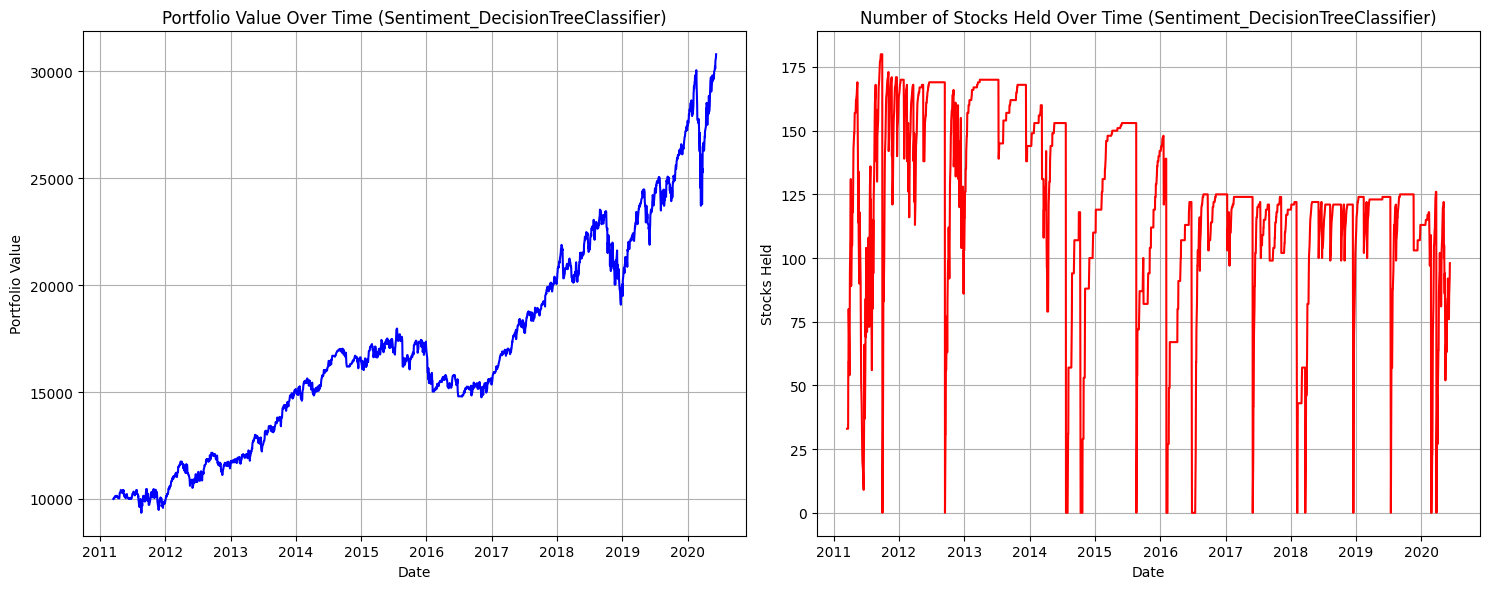

Model: Sentiment_finbert
ROI: 1.4377866917999993
Sharpe Ratio: 0.04726805628557493
Stock Price Change: 349.3074681696226
Portfolio Value Change: 143.77866917999992
Price vs Portfolio: -205.5287989896227


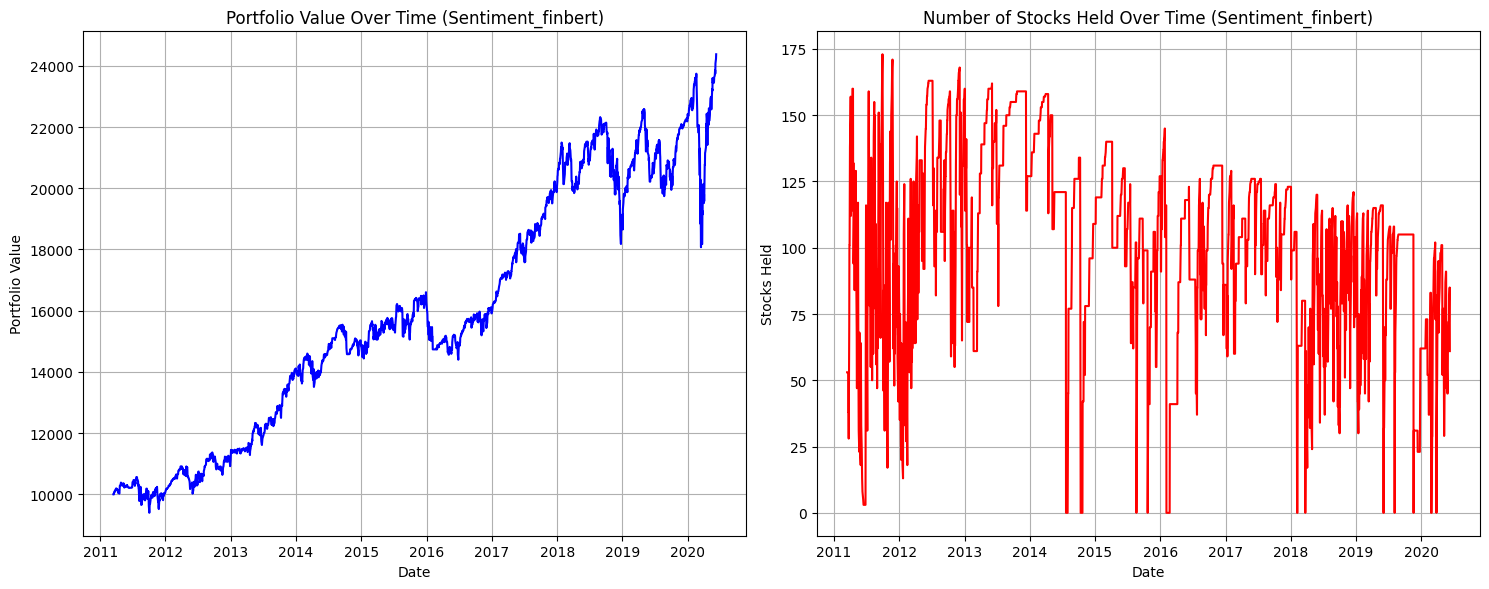

Model: Sentiment_LogisticRegression
ROI: 1.0601019232000002
Sharpe Ratio: 0.04485735894656979
Stock Price Change: 349.3074681696226
Portfolio Value Change: 106.01019232000002
Price vs Portfolio: -243.2972758496226


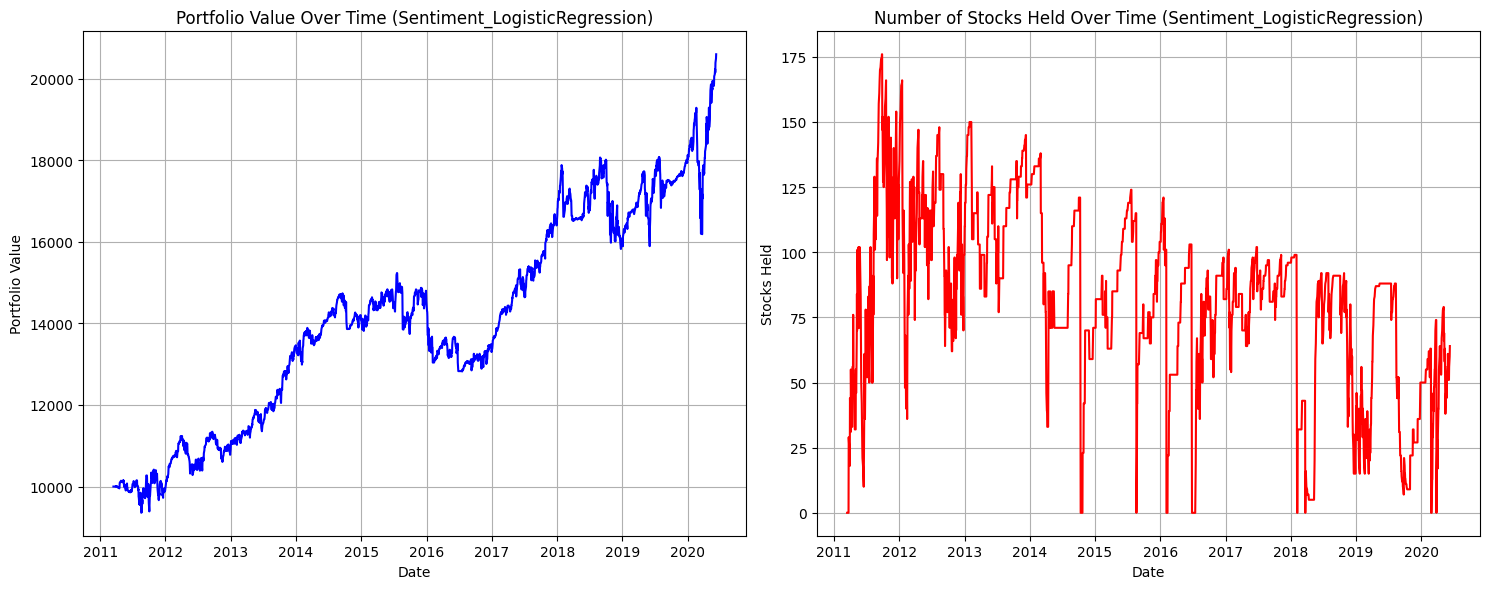

Model: Sentiment_KNeighborsClassifier
ROI: 1.0303590056000023
Sharpe Ratio: 0.04376710682530919
Stock Price Change: 349.3074681696226
Portfolio Value Change: 103.03590056000023
Price vs Portfolio: -246.27156760962237


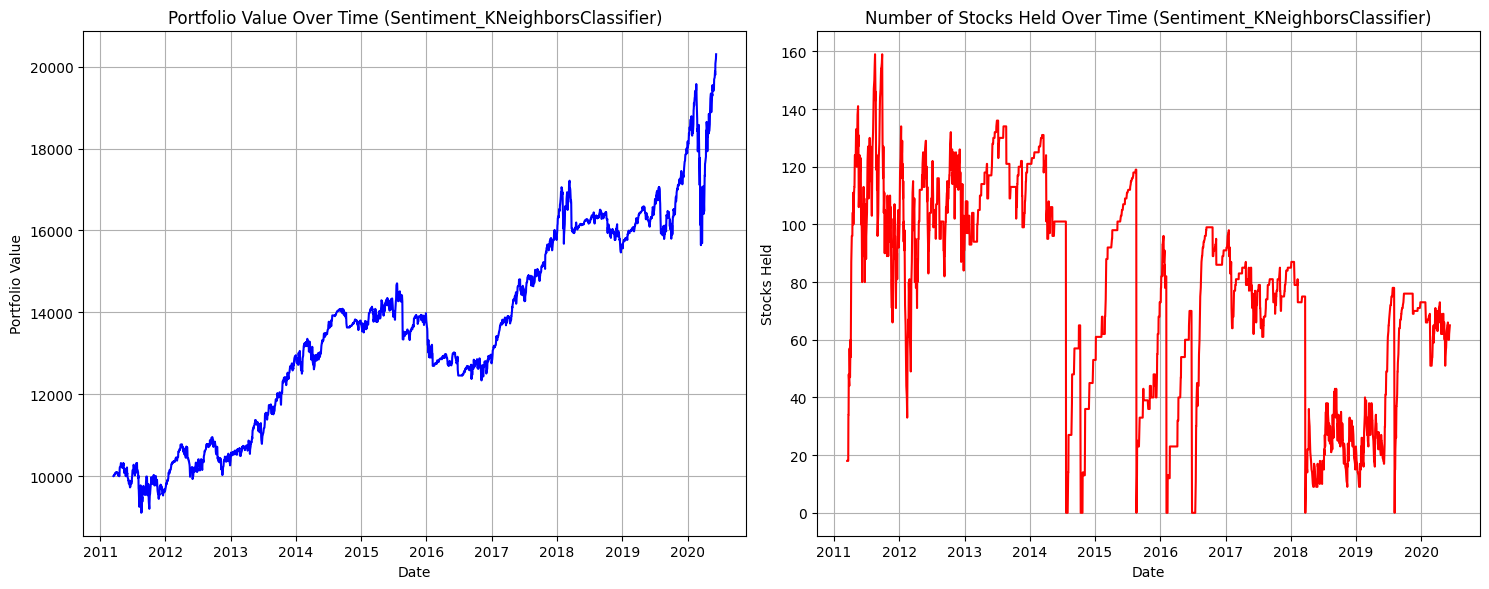

Model: Sentiment_MultinomialNB
ROI: 1.274325827800001
Sharpe Ratio: 0.05462529617697286
Stock Price Change: 349.3074681696226
Portfolio Value Change: 127.43258278000009
Price vs Portfolio: -221.87488538962253


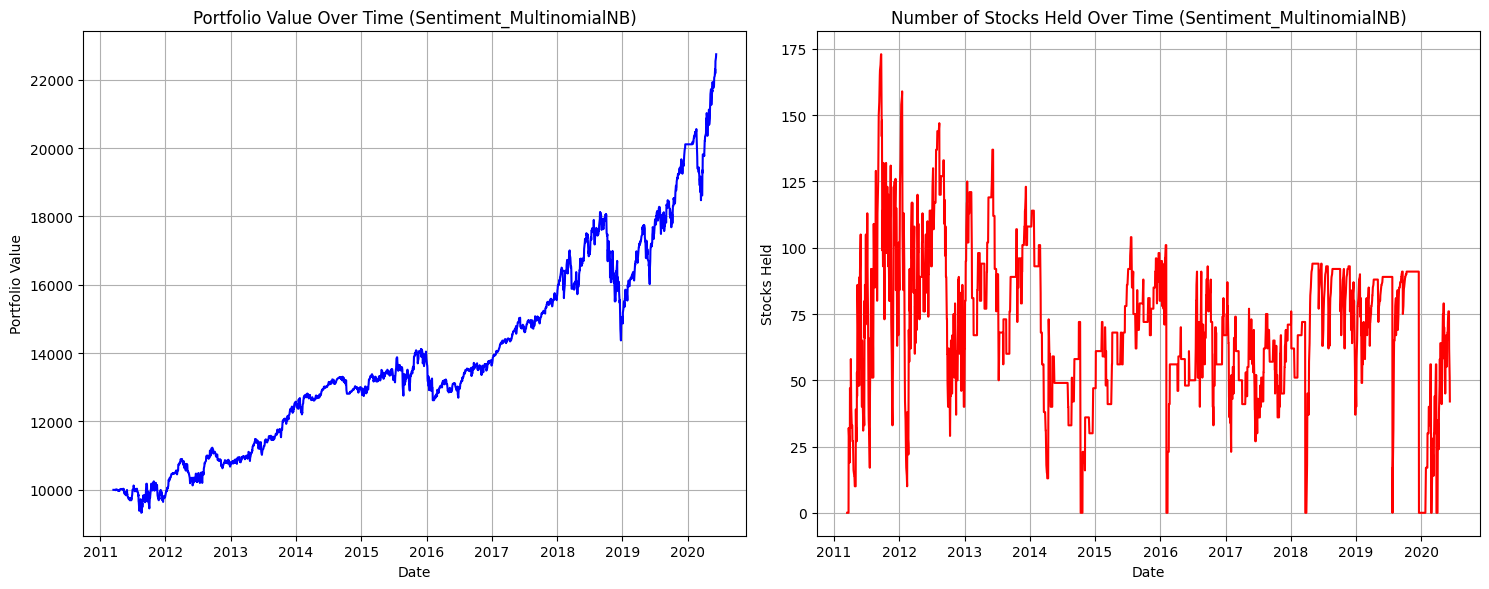

Model: Sentiment_SGDClassifier
ROI: 0.7797579136
Sharpe Ratio: 0.04750004260026655
Stock Price Change: 349.3074681696226
Portfolio Value Change: 77.97579136
Price vs Portfolio: -271.3316768096226


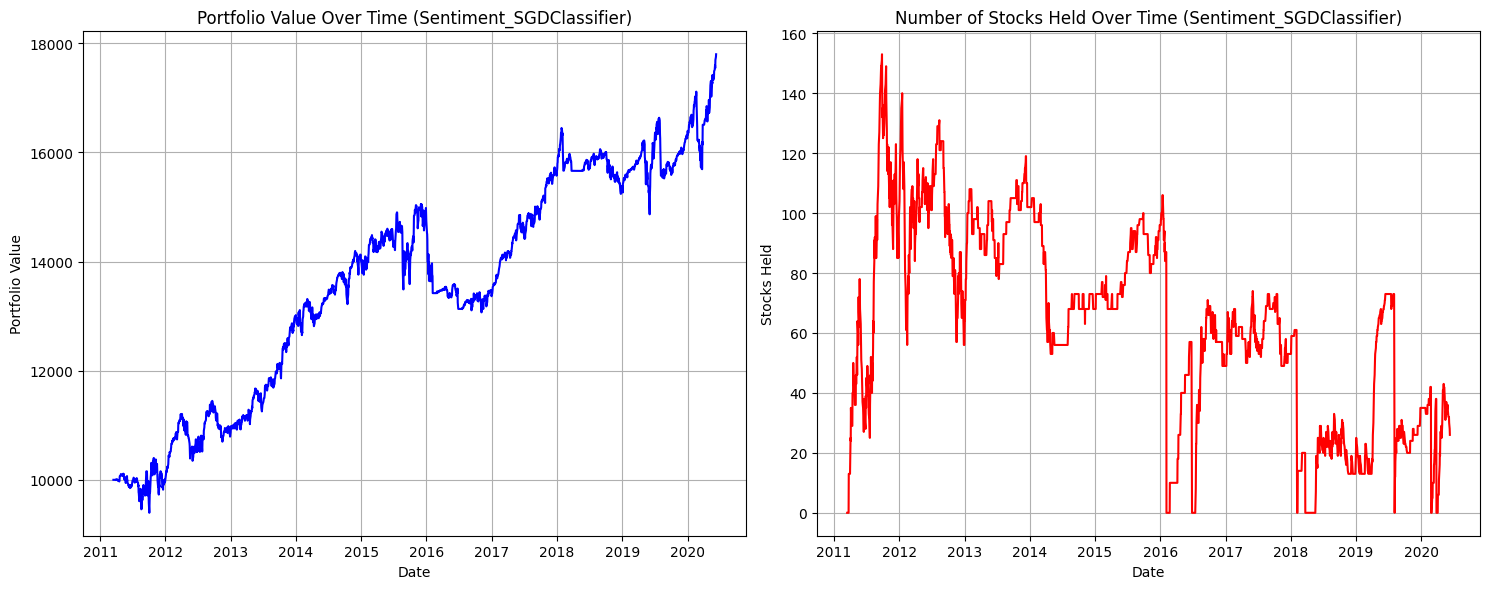

Model: Sentiment_GradientBoostingClassifier
ROI: 2.0665058813000003
Sharpe Ratio: 0.0573665184066395
Stock Price Change: 349.3074681696226
Portfolio Value Change: 206.65058813000005
Price vs Portfolio: -142.65688003962256


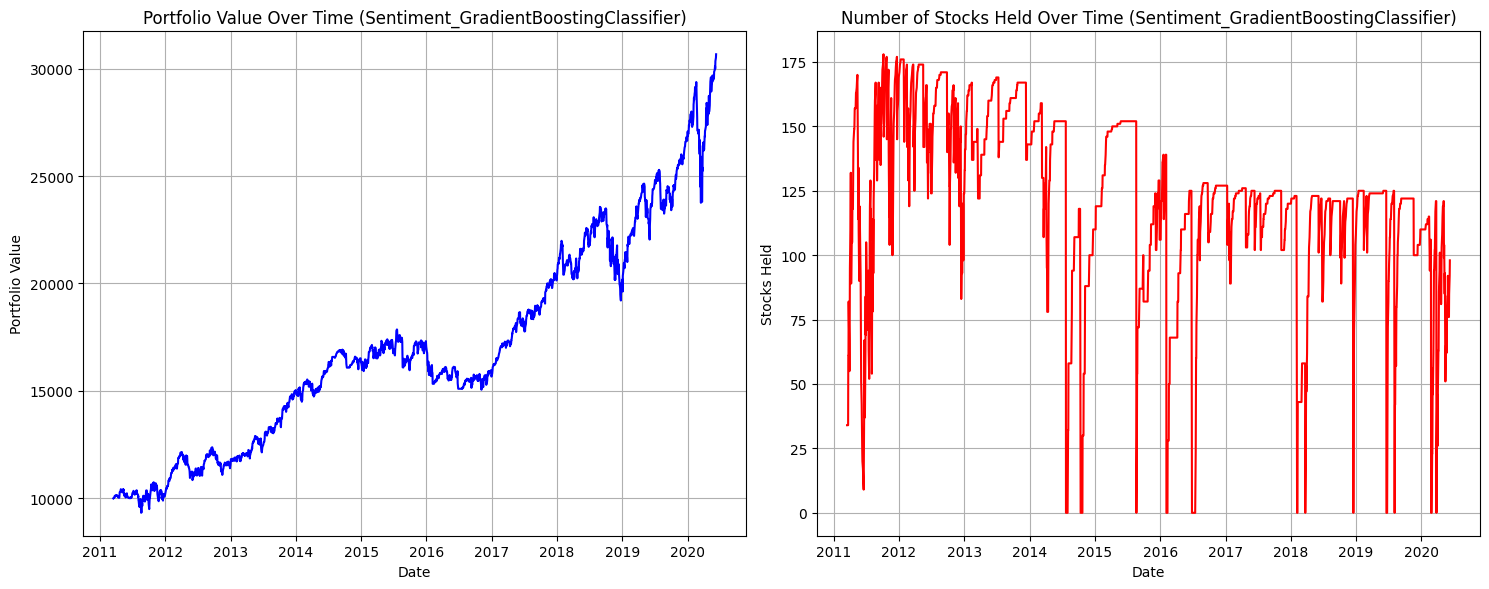

Model: Sentiment_XGBClassifier
ROI: 1.2207227944999992
Sharpe Ratio: 0.044799154932273044
Stock Price Change: 349.3074681696226
Portfolio Value Change: 122.07227944999993
Price vs Portfolio: -227.23518871962267


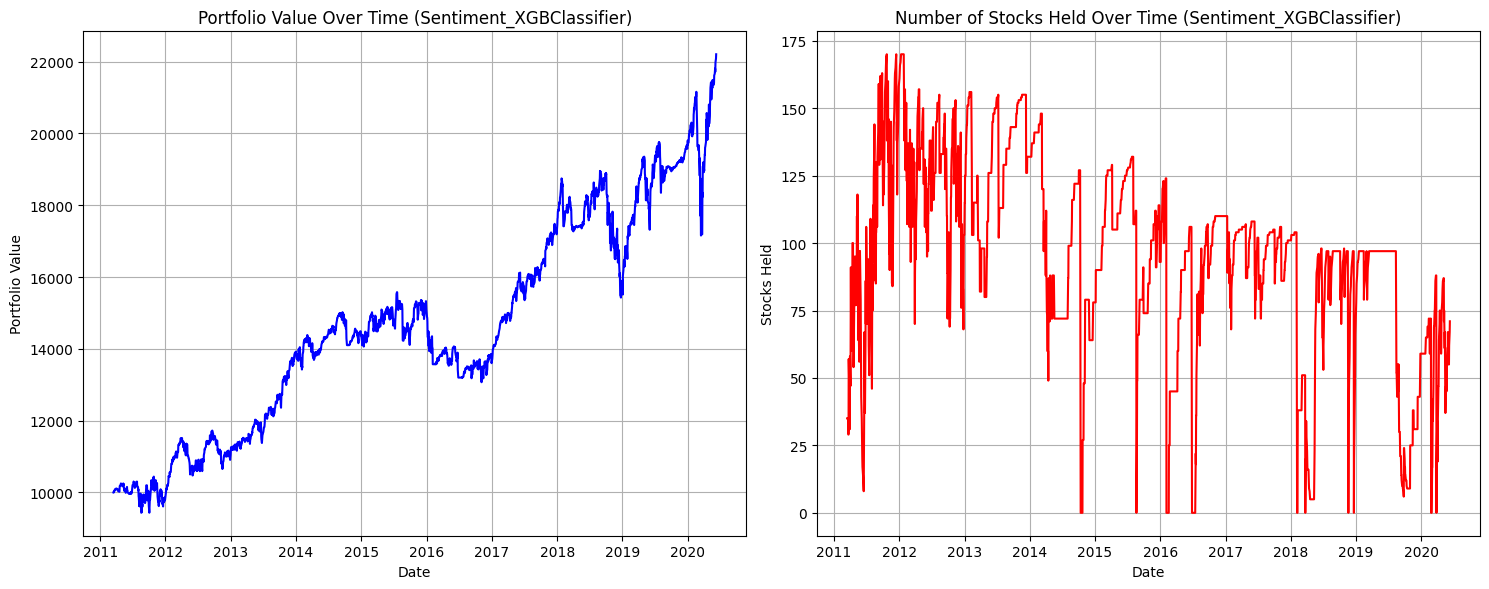

Model: Sentiment_RandomForestClassifier
ROI: 1.9989727998999995
Sharpe Ratio: 0.05757015452145866
Stock Price Change: 349.3074681696226
Portfolio Value Change: 199.89727998999996
Price vs Portfolio: -149.41018817962265


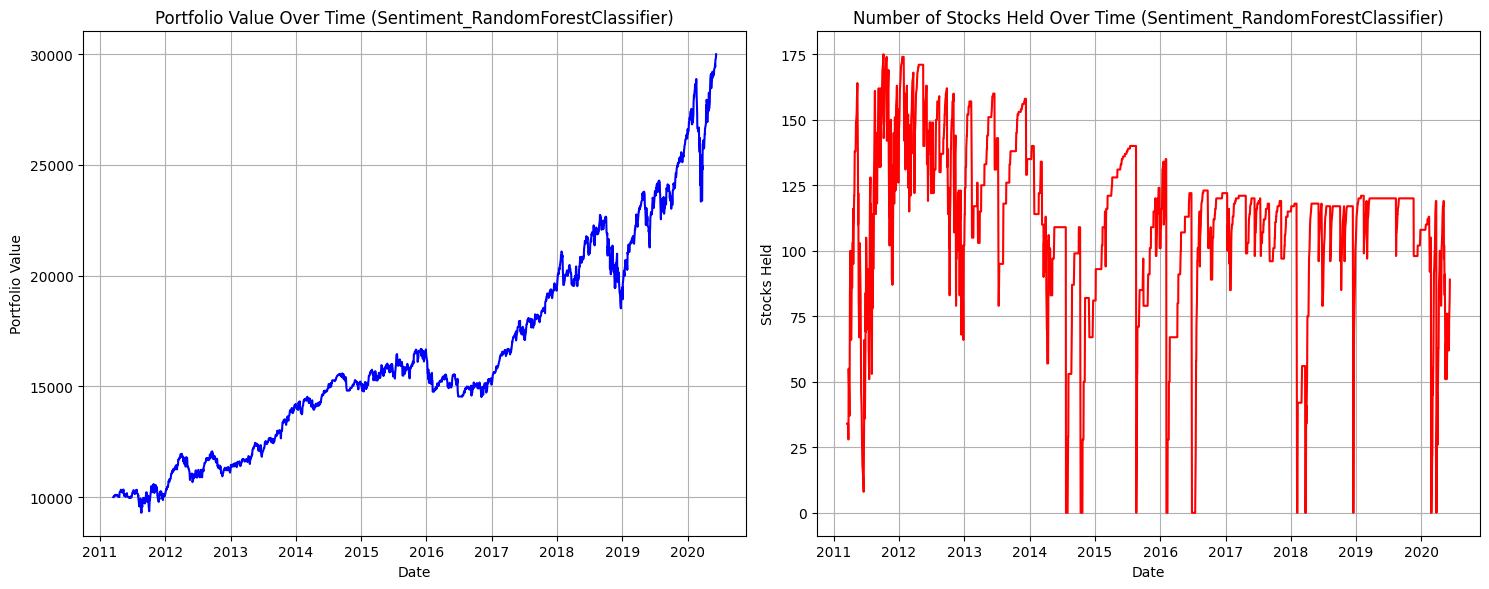

Model: Sentiment_Random
ROI: 1.126083983499998
Sharpe Ratio: 0.057217649222522024
Stock Price Change: 349.3074681696226
Portfolio Value Change: 112.6083983499998
Price vs Portfolio: -236.69906981962282


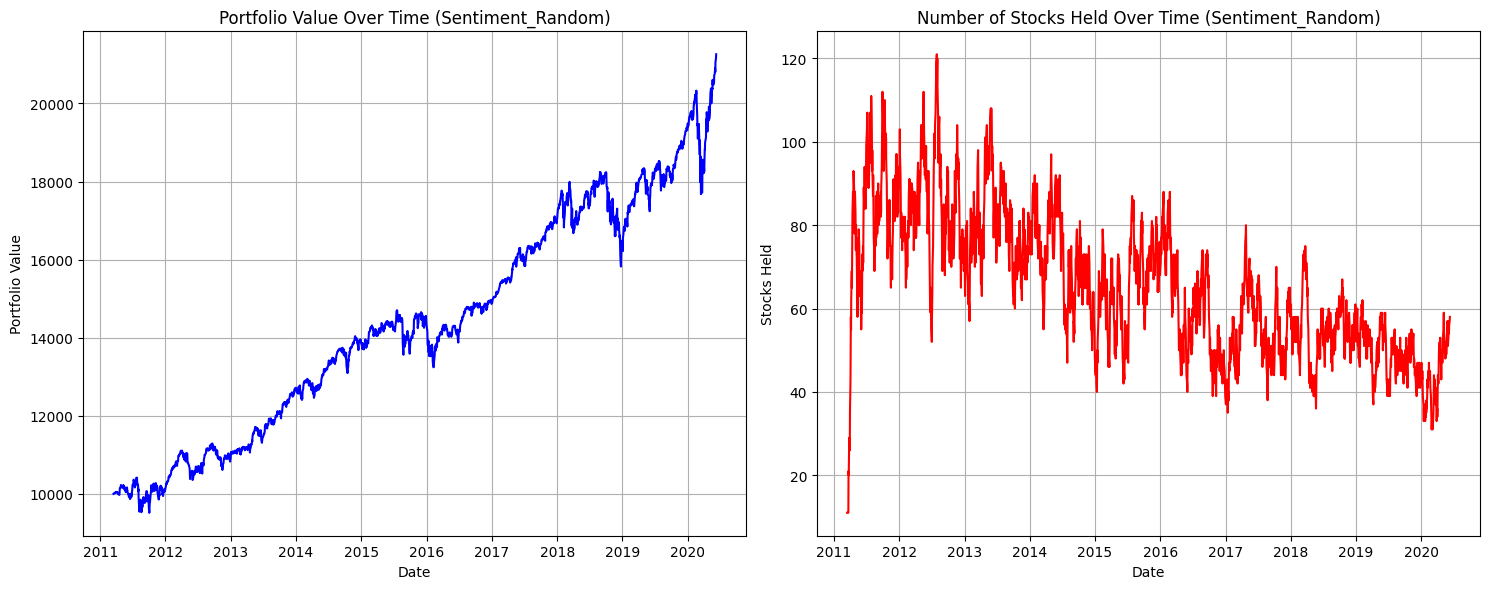

In [91]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode

# Assuming 'merged_df' is your DataFrame

# Adjusting finbert sentiment to align with other models
# merged_df['Sentiment_finbert1'] = merged_df['Sentiment_finbert'].replace({2: 1, 0: 1, 1: 0})

# Define action percent
action_percent = 0.5  # 10% of holdings

# List of sentiment columns
sentiment_cols = [col for col in merged_df.columns if 'Sentiment_' in col]

all_results = []

def calculate_position_size(sentiment, model_edge):
    base_size = 0.05  # Base position size (e.g., 5% of portfolio)
    scaling_factor = 2  # Determines how aggressively the position size scales with edge
    position_size = base_size + (model_edge - 0.5) * scaling_factor
    return max(min(position_size, 1), 0)  # Ensure the size is between 0 and 1

def execute_buy_order(stocks_to_buy, current_price, cash, stock, stop_loss_percentage, take_profit_percentage):
    cost = stocks_to_buy * current_price
    if cost <= cash:
        cash -= cost
        stock += stocks_to_buy

        # Setting stop-loss and take-profit levels
        stop_loss = current_price * (1 - stop_loss_percentage)
        take_profit = current_price * (1 + take_profit_percentage)

    return cash, stock, stop_loss, take_profit

def execute_sell_order(stocks_to_sell, current_price, cash, stock):
    revenue = stocks_to_sell * current_price
    cash += revenue
    stock -= stocks_to_sell

    return cash, stock



stop_loss_percentage = 0.05  # 5% below the purchase price
take_profit_percentage = 0.10  # 10% above the purchase price

stock_name = stock

# Loop through each sentiment model
for sentiment_col in sentiment_cols:
    initial_capital = 10000  # Starting capital
    cash = initial_capital
    stock = 0
    pnl = []
    stocks_held = []  # To track the number of stocks held over time

    stop_loss, take_profit = None, None

    for index, row in merged_df.iterrows():
        current_price = row['Close']
        sentiment = row[sentiment_col]
        position_size = calculate_position_size(sentiment, edge.loc[sentiment_col, 'Edge'])

        # Sell if negative sentiment is detected and we hold stock
        if sentiment < 0.5 and stock > 0:
            stocks_to_sell = int(stock * position_size)
            cash, stock = execute_sell_order(stocks_to_sell, current_price, cash, stock)
            stop_loss, take_profit = None, None  # Resetting stop-loss and take-profit after selling
        # Buy if positive sentiment is detected
        elif sentiment > 0.5:
            stocks_to_buy = int((cash * position_size) / current_price)
            if stocks_to_buy > 0:
                cash, stock, stop_loss, take_profit = execute_buy_order(stocks_to_buy, current_price, cash, stock, stop_loss_percentage, take_profit_percentage)

        # Check if stop-loss or take-profit conditions are met and we hold stock
        if stock > 0 and stop_loss is not None and take_profit is not None:
            if current_price <= stop_loss or current_price >= take_profit:
                cash, stock = execute_sell_order(stock, current_price, cash, stock)
                stop_loss, take_profit = None, None  # Resetting stop-loss and take-profit after selling





        portfolio_value = cash + stock * row['Close']
        pnl.append(portfolio_value)
        stocks_held.append(stock)  # Keep track of stocks held

    # Convert PnL and Stocks Held to a DataFrame
    pnl_df = pd.DataFrame({'Date': merged_df['Date'], 'Portfolio Value': pnl, 'Stocks Held': stocks_held})

    # Calculate performance metrics
    final_portfolio_value = pnl[-1]
    roi = (final_portfolio_value - initial_capital) / initial_capital
    pnl_returns = np.diff(pnl) / pnl[:-1]
    sharpe_ratio = np.mean(pnl_returns) / np.std(pnl_returns) if np.std(pnl_returns) != 0 else 0
    # Percentage increase in stock price from start to end
    stock_price_change = (merged_df['Close'].iloc[-1] - merged_df['Close'].iloc[0]) / merged_df['Close'].iloc[0] * 100
    # Percentage increase in portfolio value from start to end
    portfolio_value_change = (final_portfolio_value - initial_capital) / initial_capital * 100
    # Stock price change vs portfolio value change
    price_vs_portfolio = portfolio_value_change - stock_price_change
    


    # Print performance metrics for the current model
    print(f"Model: {sentiment_col}")
    print("ROI:", roi)
    print("Sharpe Ratio:", sharpe_ratio)
    print("Stock Price Change:", stock_price_change)
    print("Portfolio Value Change:", portfolio_value_change)
    print("Price vs Portfolio:", price_vs_portfolio)
    
    # Append the results to the list
    all_results.append([sentiment_col, roi, sharpe_ratio, stock_price_change, portfolio_value_change, price_vs_portfolio])

    # Plotting the graphs
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), tight_layout=True)

    # Plot for Portfolio Value
    ax1.plot(pnl_df['Date'], pnl_df['Portfolio Value'], linestyle='-', color='b')
    ax1.set_title(f'Portfolio Value Over Time ({sentiment_col})')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Portfolio Value')
    ax1.grid(True)

    # Plot for Stocks Held
    ax2.plot(pnl_df['Date'], pnl_df['Stocks Held'], linestyle='-', color='r')
    ax2.set_title(f'Number of Stocks Held Over Time ({sentiment_col})')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Stocks Held')
    ax2.grid(True)
    
    plt.savefig(f'results/{stock_name}/{sentiment_col}.png')
    
    plt.show()


# Remove the 'Sentiment_finbert1' column
# merged_df = merged_df.drop(columns=['Sentiment_finbert1'])

In [92]:
# Convert the results to a DataFrame
results_df = pd.DataFrame(all_results, columns=['Model', 'ROI', 'Sharpe Ratio', 'Stock Price Change', 'Portfolio Value Change', 'Price vs Portfolio'])

# Sort the DataFrame by ROI in descending order
results_df = results_df.sort_values(by='ROI', ascending=False)

results_df.to_csv(f'results/{stock_name}/{stock_name}_trading_results.csv', index=False)

# Display the DataFrame
results_df

,Model,ROI,Sharpe Ratio,Stock Price Change,Portfolio Value Change,Price vs Portfolio
0,Sentiment_DecisionTreeClassifier,2.079089,0.056106,349.307468,207.908894,-141.398574
6,Sentiment_GradientBoostingClassifier,2.066506,0.057367,349.307468,206.650588,-142.656880
8,Sentiment_RandomForestClassifier,1.998973,0.057570,349.307468,199.897280,-149.410188
1,Sentiment_finbert,1.437787,0.047268,349.307468,143.778669,-205.528799
4,Sentiment_MultinomialNB,1.274326,0.054625,349.307468,127.432583,-221.874885
7,Sentiment_XGBClassifier,1.220723,0.044799,349.307468,122.072279,-227.235189
9,Sentiment_Random,1.126084,0.057218,349.307468,112.608398,-236.699070
2,Sentiment_LogisticRegression,1.060102,0.044857,349.307468,106.010192,-243.297276
3,Sentiment_KNeighborsClassifier,1.030359,0.043767,349.307468,103.035901,-246.271568
5,Sentiment_SGDClassifier,0.779758,0.047500,349.307468,77.975791,-271.331677


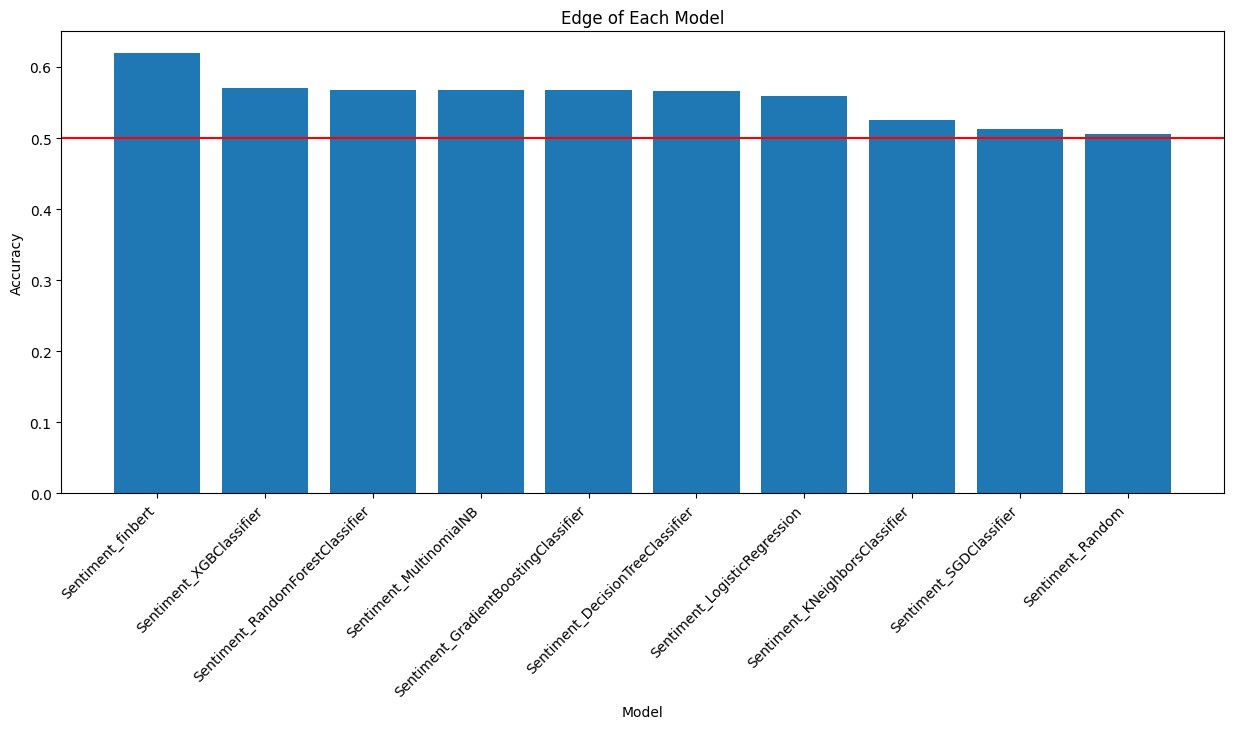

In [93]:
# Graph the accuracies
plt.figure(figsize=(15, 6))
plt.bar(edge.index, edge['Edge'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Edge of Each Model')
plt.xticks(rotation=45, ha='right')  # Rotate and align x-axis labels
plt.axhline(y=0.5, color='r', linestyle='-')  # Add horizontal line at y=0.5

plt.savefig(f'results/{stock_name}/edge_{stock_name}.png', dpi=300, bbox_inches='tight')
plt.show()